# 로지스틱 회귀

## 기울기 상승을 사용하여 가장 좋은 매개변수 찾기

In [8]:
from numpy import *

def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    print "dataMat : ", dataMat
    print "\nlabelMat : ", labelMat
    
    return dataMat, labelMat

def sigmoid(inX):
    return 1.0/ (1+exp(-inX))

def gradAscent(dataMatIn, classLabels):
    '''기울기 상승을 사용하여 매개변수 찾기'''
    dataMatrix = mat(dataMatIn)
    labelMat = mat(classLabels).transpose()
    m,n = shape(dataMatrix)
    alpha=0.001
    maxCycles = 500 # maxCycles : 계산반복 횟수
    weights = ones((n,1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)
        error = (labelMat - h)
        # 아래 wieght는 행렬식의 곱이라는 것
        weights = weights + alpha*dataMatrix.transpose()*error # alpha : 목적을 위한 단위 크기, 
    print "weights : ", weights
    return weights

In [5]:
dataArr, labelMat = loadDataSet()

dataMat :  [[1.0, -0.017612, 14.053064], [1.0, -1.395634, 4.662541], [1.0, -0.752157, 6.53862], [1.0, -1.322371, 7.152853], [1.0, 0.423363, 11.054677], [1.0, 0.406704, 7.067335], [1.0, 0.667394, 12.741452], [1.0, -2.46015, 6.866805], [1.0, 0.569411, 9.548755], [1.0, -0.026632, 10.427743], [1.0, 0.850433, 6.920334], [1.0, 1.347183, 13.1755], [1.0, 1.176813, 3.16702], [1.0, -1.781871, 9.097953], [1.0, -0.566606, 5.749003], [1.0, 0.931635, 1.589505], [1.0, -0.024205, 6.151823], [1.0, -0.036453, 2.690988], [1.0, -0.196949, 0.444165], [1.0, 1.014459, 5.754399], [1.0, 1.985298, 3.230619], [1.0, -1.693453, -0.55754], [1.0, -0.576525, 11.778922], [1.0, -0.346811, -1.67873], [1.0, -2.124484, 2.672471], [1.0, 1.217916, 9.597015], [1.0, -0.733928, 9.098687], [1.0, -3.642001, -1.618087], [1.0, 0.315985, 3.523953], [1.0, 1.416614, 9.619232], [1.0, -0.386323, 3.989286], [1.0, 0.556921, 8.294984], [1.0, 1.224863, 11.58736], [1.0, -1.347803, -2.406051], [1.0, 1.196604, 4.951851], [1.0, 0.275221, 9.543

In [12]:
weights = gradAscent(dataArr, labelMat)

weights :  [[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


## 경계선 plot 함수

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
def plotBestFit(wei):
    weights = wei
    dataMat, labelMat = loadDataSet()
    dataArr = array(dataMat)
    
    n = shape(dataArr)[0]
    
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker = 's')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]
    ax.plot(x,y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

In [15]:
weights.getA()

array([[ 4.12414349],
       [ 0.48007329],
       [-0.6168482 ]])

dataMat :  [[1.0, -0.017612, 14.053064], [1.0, -1.395634, 4.662541], [1.0, -0.752157, 6.53862], [1.0, -1.322371, 7.152853], [1.0, 0.423363, 11.054677], [1.0, 0.406704, 7.067335], [1.0, 0.667394, 12.741452], [1.0, -2.46015, 6.866805], [1.0, 0.569411, 9.548755], [1.0, -0.026632, 10.427743], [1.0, 0.850433, 6.920334], [1.0, 1.347183, 13.1755], [1.0, 1.176813, 3.16702], [1.0, -1.781871, 9.097953], [1.0, -0.566606, 5.749003], [1.0, 0.931635, 1.589505], [1.0, -0.024205, 6.151823], [1.0, -0.036453, 2.690988], [1.0, -0.196949, 0.444165], [1.0, 1.014459, 5.754399], [1.0, 1.985298, 3.230619], [1.0, -1.693453, -0.55754], [1.0, -0.576525, 11.778922], [1.0, -0.346811, -1.67873], [1.0, -2.124484, 2.672471], [1.0, 1.217916, 9.597015], [1.0, -0.733928, 9.098687], [1.0, -3.642001, -1.618087], [1.0, 0.315985, 3.523953], [1.0, 1.416614, 9.619232], [1.0, -0.386323, 3.989286], [1.0, 0.556921, 8.294984], [1.0, 1.224863, 11.58736], [1.0, -1.347803, -2.406051], [1.0, 1.196604, 4.951851], [1.0, 0.275221, 9.543

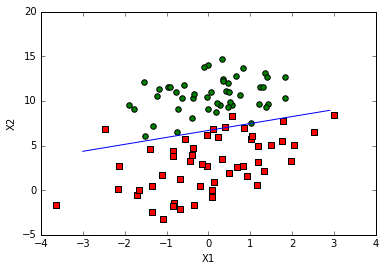

In [19]:
plotBestFit(weights.getA())

## 확률 기울기 상승

In [21]:
def stocGradAscent0(dataMatrix, classLabels):
    ''' h 와 error가 더이상 벡터값이 아니다'''
    m,n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights+alpha*error*dataMatrix[i]
        
    return weights

dataMat :  [[1.0, -0.017612, 14.053064], [1.0, -1.395634, 4.662541], [1.0, -0.752157, 6.53862], [1.0, -1.322371, 7.152853], [1.0, 0.423363, 11.054677], [1.0, 0.406704, 7.067335], [1.0, 0.667394, 12.741452], [1.0, -2.46015, 6.866805], [1.0, 0.569411, 9.548755], [1.0, -0.026632, 10.427743], [1.0, 0.850433, 6.920334], [1.0, 1.347183, 13.1755], [1.0, 1.176813, 3.16702], [1.0, -1.781871, 9.097953], [1.0, -0.566606, 5.749003], [1.0, 0.931635, 1.589505], [1.0, -0.024205, 6.151823], [1.0, -0.036453, 2.690988], [1.0, -0.196949, 0.444165], [1.0, 1.014459, 5.754399], [1.0, 1.985298, 3.230619], [1.0, -1.693453, -0.55754], [1.0, -0.576525, 11.778922], [1.0, -0.346811, -1.67873], [1.0, -2.124484, 2.672471], [1.0, 1.217916, 9.597015], [1.0, -0.733928, 9.098687], [1.0, -3.642001, -1.618087], [1.0, 0.315985, 3.523953], [1.0, 1.416614, 9.619232], [1.0, -0.386323, 3.989286], [1.0, 0.556921, 8.294984], [1.0, 1.224863, 11.58736], [1.0, -1.347803, -2.406051], [1.0, 1.196604, 4.951851], [1.0, 0.275221, 9.543

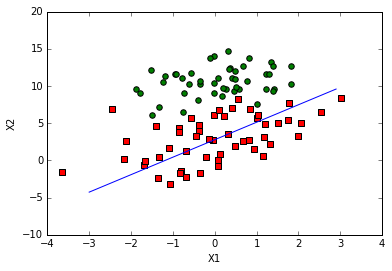

In [22]:
weights = stocGradAscent0(array(dataArr), labelMat)
plotBestFit(weights)

## 수정된 확률 기울기 상승

In [23]:
def stocGradAscent1(dataMatrix, classLabels, numIter = 150):
    m,n = shape(dataMatrix)
    weights = ones(n)
    
    for j in range(numIter):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4 / (1.0 + j + i) + 0.01 # alpha 값을 각각(j,i) 반복하여 구함
            
            randIndex = int(random.uniform(0,len(dataIndex))) # 임의의 index 구하기
            h = sigmoid(sum(dataMatrix[randIndex] * weights)) # 위의 randIndex를 통해 h값을 구함
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
            
    return weights

dataMat :  [[1.0, -0.017612, 14.053064], [1.0, -1.395634, 4.662541], [1.0, -0.752157, 6.53862], [1.0, -1.322371, 7.152853], [1.0, 0.423363, 11.054677], [1.0, 0.406704, 7.067335], [1.0, 0.667394, 12.741452], [1.0, -2.46015, 6.866805], [1.0, 0.569411, 9.548755], [1.0, -0.026632, 10.427743], [1.0, 0.850433, 6.920334], [1.0, 1.347183, 13.1755], [1.0, 1.176813, 3.16702], [1.0, -1.781871, 9.097953], [1.0, -0.566606, 5.749003], [1.0, 0.931635, 1.589505], [1.0, -0.024205, 6.151823], [1.0, -0.036453, 2.690988], [1.0, -0.196949, 0.444165], [1.0, 1.014459, 5.754399], [1.0, 1.985298, 3.230619], [1.0, -1.693453, -0.55754], [1.0, -0.576525, 11.778922], [1.0, -0.346811, -1.67873], [1.0, -2.124484, 2.672471], [1.0, 1.217916, 9.597015], [1.0, -0.733928, 9.098687], [1.0, -3.642001, -1.618087], [1.0, 0.315985, 3.523953], [1.0, 1.416614, 9.619232], [1.0, -0.386323, 3.989286], [1.0, 0.556921, 8.294984], [1.0, 1.224863, 11.58736], [1.0, -1.347803, -2.406051], [1.0, 1.196604, 4.951851], [1.0, 0.275221, 9.543

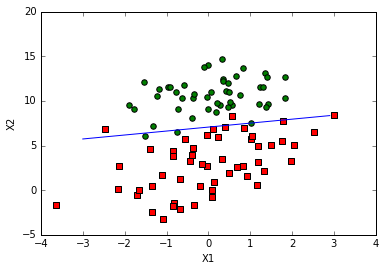

In [24]:
weights = stocGradAscent1(array(dataArr), labelMat)
plotBestFit(weights)

# 말의 배앓이 치사율 평가

## 1) 데이터에서 누락된 값 다루기

### 1-1 누락된 값을 실질적인 수로 대체 => 0
### 1-2 검사 데이터 에서의 누락된 값은 무시

## 2) 로지스틱 회귀로 분류하기

In [25]:
def classifyVector(inX, weights):
    '''입력값과 가중치 값을 통해 sigmoid 계산(0.5 보다 크면 1, 아니면 0)'''
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5 : return 1.0
    else : return 0.0

def colicTest():
    '''훈련데이터와 테스트데이터를 로지스틱 수행'''
    frTrain = open('horseColicTraining.txt')
    frTest = open('horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
        
    trainWeights = stocGradAscent1(array(trainingSet), trainingLabels, 500)
    errorCount = 0; numTestVec = 0.0
    
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr), trainWeights)) != int(currLine[21]):
            errorCount += 1
            
    errorRate = (float(errorCount) / numTestVec)
    print "the error rate of this test is : %f" % errorRate
    return errorRate

def multiTest():
    '''colicTest()를 10번 수행하여 평균 계산'''
    numTests = 10; errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest()
    print "after %d iterations the average error rate is : %f" %(numTests, errorSum / float(numTests))

In [26]:
multiTest()

C:\Users\Administrator\Anaconda3\envs\py2k\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: overflow encountered in exp


the error rate of this test is : 0.373134
the error rate of this test is : 0.432836
the error rate of this test is : 0.343284
the error rate of this test is : 0.373134
the error rate of this test is : 0.373134
the error rate of this test is : 0.447761
the error rate of this test is : 0.328358
the error rate of this test is : 0.313433
the error rate of this test is : 0.358209
the error rate of this test is : 0.373134
after 10 iterations the average error rate is : 0.371642
